In [419]:
import pandas as pd
import random
df = pd.read_csv('letter-recognition.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# Preprocessing

In [420]:
df_H = df.loc[df[0]=='H']
df_K = df.loc[df[0]=='K']
df_M = df.loc[df[0]=='M']
df_Y = df.loc[df[0]=='Y']
df_C = df.loc[df[0]=='C']
df_Z = df.loc[df[0]=='Z']
df_C

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
17,C,7,10,5,5,2,6,8,6,8,11,7,11,2,8,5,9
25,C,6,11,7,8,3,7,8,7,11,4,7,14,1,7,4,8
58,C,6,10,4,5,2,6,9,6,6,11,7,7,2,9,5,9
61,C,2,3,3,1,1,5,9,4,6,11,9,11,1,9,2,8
82,C,6,12,5,7,4,8,5,4,3,9,9,11,4,9,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19873,C,4,6,5,4,5,7,7,4,3,6,8,10,5,11,3,8
19905,C,5,4,6,6,2,6,7,7,11,8,6,13,1,9,4,8
19968,C,6,9,6,7,4,4,7,5,7,10,9,14,4,9,5,5
19971,C,5,10,7,9,8,5,6,4,4,7,6,11,5,11,8,10


In [421]:
df_HK = pd.concat([df_H,df_K],ignore_index=True)
df_MY = pd.concat([df_M,df_Y],ignore_index=True)
df_CZ = pd.concat([df_C,df_Z],ignore_index=True)
df_HK

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
1,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
2,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
3,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
4,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,K,7,9,8,5,4,5,8,4,6,10,11,11,6,12,4,7
1469,K,5,9,5,4,2,7,7,3,6,9,8,9,6,11,3,7
1470,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
1471,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9


# Model Fitting

## KNN (pair 1)

In [422]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,cross_val_score # Import train_test_split function

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

def cross_validation(df,model):
    X = df.loc[:,1:]
    y = df.loc[:,0]
    kf = KFold(n_splits=5)
    score = []
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index], \
                                            y.iloc[train_index],y.iloc[test_index]
        score.append(get_score((model),X_train, X_test, y_train, y_test))
    return score

In [524]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean
import warnings
import time
warnings.filterwarnings('ignore')
accuracy = []
knn_accuracy = []
accuracy_dict = dict()
time_dict = dict()
time_dict['KNN_HK'] = []
accuracy_test = dict()
time_test = dict()
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation(df_HK,KNeighborsClassifier(n_neighbors=i)))
    knn_accuracy.append(mean(cross_validation(df_HK,KNeighborsClassifier(n_neighbors=i))))
    print("k = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['KNN_HK'].append(time.time() - start_time)
accuracy_dict['KNN_HK'] = knn_accuracy
print(knn_accuracy)

k =  1  --- 0.17816615104675293 seconds ---
k =  2  --- 0.13860487937927246 seconds ---
k =  3  --- 0.1273198127746582 seconds ---
k =  4  --- 0.13907504081726074 seconds ---
k =  5  --- 0.14830803871154785 seconds ---
[0.9368315461777932, 0.9157131327107114, 0.9266436065951804, 0.9157384987893462, 0.914440216764672]


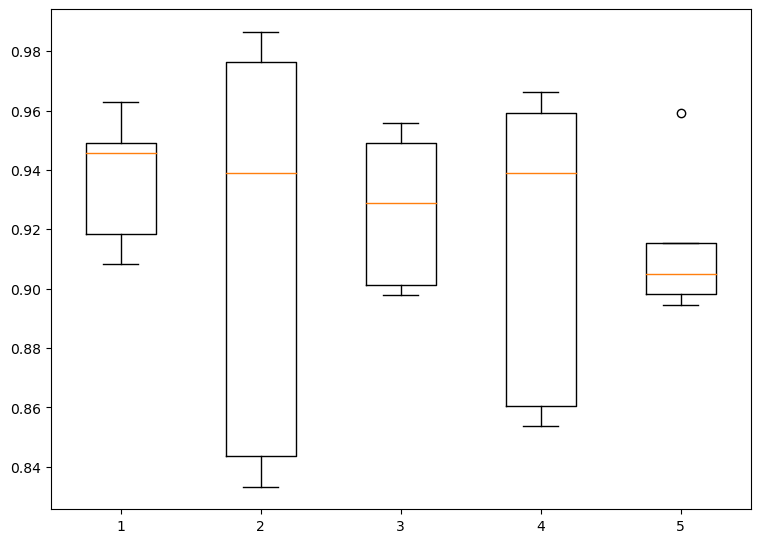

In [525]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [526]:
#choose k = 1 because it has the highest accuracy and a relatively tight boxplot range.

In [527]:
from sklearn.metrics import accuracy_score
# k = 1 on validation set:
start_time = time.time()
X = df_HK.loc[:,1:]
y = df_HK.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)

print("Accuracy for k = 1 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("k = 1 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['KNN_pair1'] = accuracy_score(y_test, model.predict(X_test))
time_test['KNN_pair1'] = time.time() - start_time

Accuracy for k = 1 is  0.9527027027027027
k = 1 --- 0.019008874893188477 seconds ---


## KNN (pair 2)

In [528]:
warnings.filterwarnings('ignore')
accuracy = []
knn_accuracy = []
time_dict['KNN_MY'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation(df_MY,KNeighborsClassifier(n_neighbors=i)))
    knn_accuracy.append(mean(cross_validation(df_MY,KNeighborsClassifier(n_neighbors=i))))
    print("k = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['KNN_MY'].append(time.time() - start_time)
accuracy_dict['KNN_MY'] = knn_accuracy
print(knn_accuracy)

k =  1  --- 0.17001914978027344 seconds ---
k =  2  --- 0.1394791603088379 seconds ---
k =  3  --- 0.1634531021118164 seconds ---
k =  4  --- 0.16339898109436035 seconds ---
k =  5  --- 0.15231895446777344 seconds ---
[1.0, 0.9980952380952381, 0.9980952380952381, 0.9974603174603175, 0.9980952380952381]


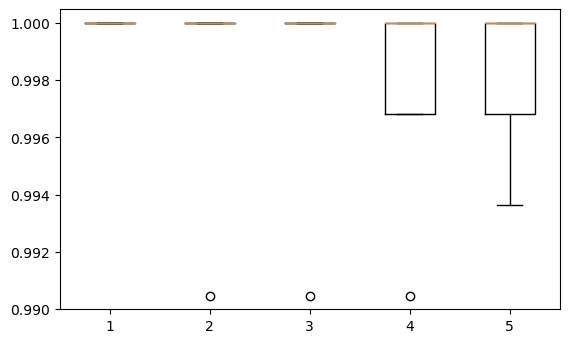

In [529]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [530]:
#choose k = 1 because it has the highest accuracy and a very tight boxplot range.

In [531]:
from sklearn.metrics import accuracy_score
# k = 1 on validation set:
start_time = time.time()
X = df_MY.loc[:,1:]
y = df_MY.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for k = 1 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("k = 1 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['KNN_pair2'] = accuracy_score(y_test, model.predict(X_test))
time_test['KNN_pair2'] = time.time() - start_time

Accuracy for k = 1 is  1.0
k = 1 --- 0.022477149963378906 seconds ---


## KNN (pair 3)

In [532]:
warnings.filterwarnings('ignore')
accuracy = []
knn_accuracy = []
time_dict['KNN_CZ'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation(df_CZ,KNeighborsClassifier(n_neighbors=i)))
    knn_accuracy.append(mean(cross_validation(df_MY,KNeighborsClassifier(n_neighbors=i))))
    print("k = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['KNN_CZ'].append(time.time() - start_time)
accuracy_dict['KNN_CZ'] = knn_accuracy
print(knn_accuracy)

k =  1  --- 0.1501479148864746 seconds ---
k =  2  --- 0.12996912002563477 seconds ---
k =  3  --- 0.14267182350158691 seconds ---
k =  4  --- 0.1483159065246582 seconds ---
k =  5  --- 0.16374897956848145 seconds ---
[1.0, 0.9980952380952381, 0.9980952380952381, 0.9974603174603175, 0.9980952380952381]


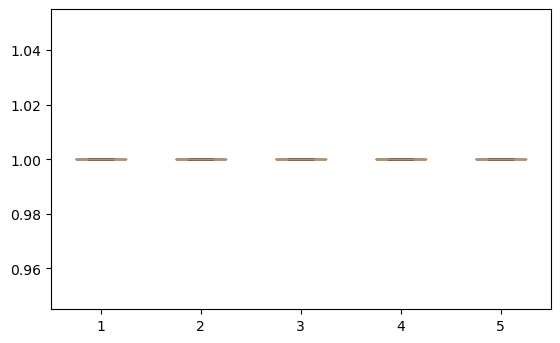

In [533]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [534]:
#choose k = 1 because it has the highest accuracy and a very tight boxplot range.

In [535]:
from sklearn.metrics import accuracy_score
# k = 1 on validation set:
start_time = time.time()
X = df_CZ.loc[:,1:]
y = df_CZ.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for k = 1 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("k = 1 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['KNN_pair3'] = accuracy_score(y_test, model.predict(X_test))
time_test['KNN_pair3'] = time.time() - start_time

Accuracy for k = 1 is  1.0
k = 1 --- 0.02128887176513672 seconds ---


## Random Forest (pair 1)

In [538]:
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
accuracy = []
rf_accuracy = []
time_dict['rf_HK'] = []
estimator_list = [10,20,30,40,50]
for i in estimator_list:
    start_time = time.time()
    accuracy.append(cross_validation(df_HK,RandomForestClassifier(n_estimators=i)))
    rf_accuracy.append(mean(cross_validation(df_HK,RandomForestClassifier(n_estimators=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['rf_HK'].append(time.time() - start_time)
accuracy_dict['rf_HK'] = rf_accuracy
print(rf_accuracy)

n =  10  --- 0.2629828453063965 seconds ---
n =  20  --- 0.34820985794067383 seconds ---
n =  30  --- 0.5185511112213135 seconds ---
n =  40  --- 0.6558549404144287 seconds ---
n =  50  --- 0.8426260948181152 seconds ---
[0.941586532918252, 0.9511103424420616, 0.9517952265652023, 0.9579061455090511, 0.9545024789576848]


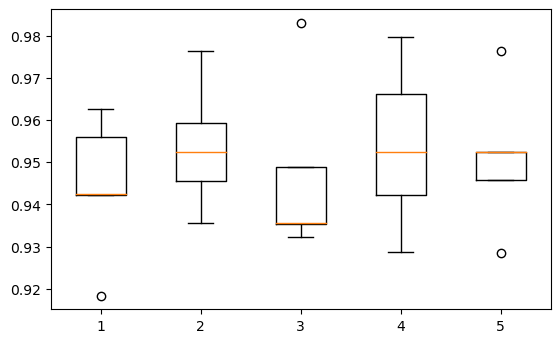

In [539]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [540]:
#choose the second, n = 20, because it has the highest accuracy and a very tight boxplot range.

In [541]:
from sklearn.metrics import accuracy_score
# n = 20 on validation set:
start_time = time.time()
X = df_HK.loc[:,1:]
y = df_HK.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = RandomForestClassifier(n_estimators=20).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for n = 20 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("n = 20 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['RF_pair1'] = accuracy_score(y_test, model.predict(X_test))
time_test['RF_pair1'] = time.time() - start_time

Accuracy for n = 20 is  0.9662162162162162
n = 20 --- 0.052581071853637695 seconds ---


## Random Forest (pair 2)

In [542]:
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
accuracy = []
rf_accuracy = []
time_dict['rf_MY'] = []
estimator_list = [10,20,30,40,50]
for i in estimator_list:
    start_time = time.time()
    accuracy.append(cross_validation(df_MY,RandomForestClassifier(n_estimators=i)))
    rf_accuracy.append(mean(cross_validation(df_MY,RandomForestClassifier(n_estimators=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['rf_MY'].append(time.time() - start_time)
accuracy_dict['rf_MY'] = rf_accuracy
print(rf_accuracy)

n =  10  --- 0.2245161533355713 seconds ---
n =  20  --- 0.34354591369628906 seconds ---
n =  30  --- 0.5127098560333252 seconds ---
n =  40  --- 0.599686861038208 seconds ---
n =  50  --- 0.7287309169769287 seconds ---
[0.9898533252963633, 0.9968274060679124, 0.9949266626481816, 0.9955595740405867, 0.9955595740405867]


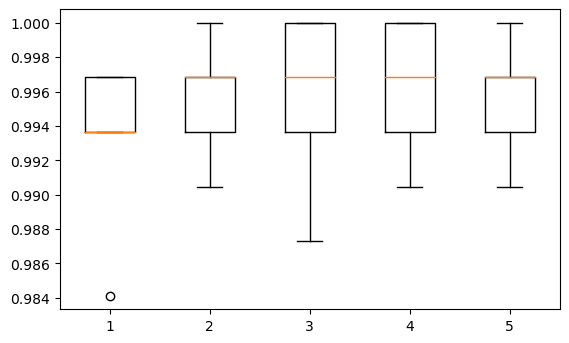

In [543]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [544]:
#choose the third, n = 30, because it has the highest accuracy and a very tight boxplot range.

In [545]:
from sklearn.metrics import accuracy_score
# n = 30 on validation set:
start_time = time.time()
X = df_MY.loc[:,1:]
y = df_MY.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = RandomForestClassifier(n_estimators=30).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for n = 30 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("n = 30 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['RF_pair2'] = accuracy_score(y_test, model.predict(X_test))
time_test['RF_pair2'] = time.time() - start_time

Accuracy for n = 30 is  1.0
n = 30 --- 0.06842589378356934 seconds ---


## Random Forest (pair 3)

In [546]:
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
accuracy = []
rf_accuracy = []
time_dict['rf_CZ'] = []
estimator_list = [10,20,30,40,50]
for i in estimator_list:
    start_time = time.time()
    accuracy.append(cross_validation(df_CZ,RandomForestClassifier(n_estimators=i)))
    rf_accuracy.append(mean(cross_validation(df_CZ,RandomForestClassifier(n_estimators=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['rf_CZ'].append(time.time() - start_time)
accuracy_dict['rf_CZ'] = rf_accuracy
print(rf_accuracy)

n =  10  --- 0.21624422073364258 seconds ---
n =  20  --- 0.31807398796081543 seconds ---
n =  30  --- 0.47083282470703125 seconds ---
n =  40  --- 0.57657790184021 seconds ---
n =  50  --- 0.7590599060058594 seconds ---
[0.9959183673469387, 0.9959183673469387, 0.9993197278911564, 0.9972789115646259, 0.998639455782313]


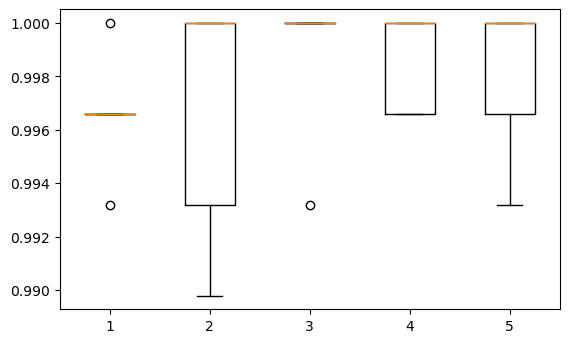

In [547]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [548]:
#choose the third, n = 30, because it has the highest accuracy and a very tight boxplot range.

In [549]:
from sklearn.metrics import accuracy_score
# n = 30 on validation set:
start_time = time.time()
X = df_CZ.loc[:,1:]
y = df_CZ.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = RandomForestClassifier(n_estimators=30).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for n = 30 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("n = 30 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['RF_pair3'] = accuracy_score(y_test, model.predict(X_test))
time_test['RF_pair3'] = time.time() - start_time

Accuracy for n = 30 is  1.0
n = 30 --- 0.07038617134094238 seconds ---


# Optional extension 3 - Consider more classification models

## Decision Tree (pair 1)

In [550]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
warnings.filterwarnings('ignore')
accuracy = []
dt_accuracy = []
time_dict['dt_HK'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation(df_HK,DecisionTreeClassifier(max_depth=i)))
    dt_accuracy.append(mean(cross_validation(df_HK,DecisionTreeClassifier(max_depth=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['dt_HK'].append(time.time() - start_time)
accuracy_dict['dt_HK'] = dt_accuracy
print(dt_accuracy)

n =  1  --- 0.04375290870666504 seconds ---
n =  2  --- 0.05125594139099121 seconds ---
n =  3  --- 0.04836297035217285 seconds ---
n =  4  --- 0.05287027359008789 seconds ---
n =  5  --- 0.05630207061767578 seconds ---
[0.7594972904416004, 0.7312625389138706, 0.8275337253545486, 0.8451677620200623, 0.8642038510319382]


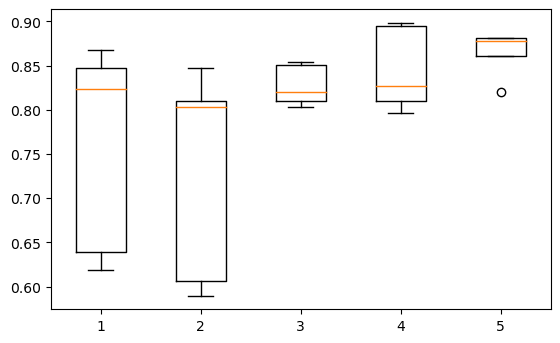

In [551]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [552]:
#choose max_depth = 5, because it has the highest accuracy and a very tight boxplot range.
from sklearn.metrics import accuracy_score
# max_depth=5 on validation set:
start_time = time.time()
X = df_HK.loc[:,1:]
y = df_HK.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy for max_depth=5 is ",accuracy_score(y_test, model.predict(X_test)))
print("max_depth=5 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['DT_pair1'] = accuracy_score(y_test, model.predict(X_test))
time_test['DT_pair1'] = time.time() - start_time

Accuracy for max_depth=5 is  0.9121621621621622
max_depth=5 --- 0.010676860809326172 seconds ---


## Decision Tree (pair 2)

In [553]:
warnings.filterwarnings('ignore')
accuracy = []
dt_accuracy = []
time_dict['dt_MY'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation(df_MY,DecisionTreeClassifier(max_depth=i)))
    dt_accuracy.append(mean(cross_validation(df_MY,DecisionTreeClassifier(max_depth=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['dt_MY'].append(time.time() - start_time)
accuracy_dict['dt_MY'] = dt_accuracy
print(dt_accuracy)

n =  1  --- 0.046813249588012695 seconds ---
n =  2  --- 0.05413484573364258 seconds ---
n =  3  --- 0.0483088493347168 seconds ---
n =  4  --- 0.04085087776184082 seconds ---
n =  5  --- 0.04640007019042969 seconds ---
[0.9213703033956199, 0.9499638336347197, 0.9771770142656219, 0.9778159533855736, 0.9828852722523609]


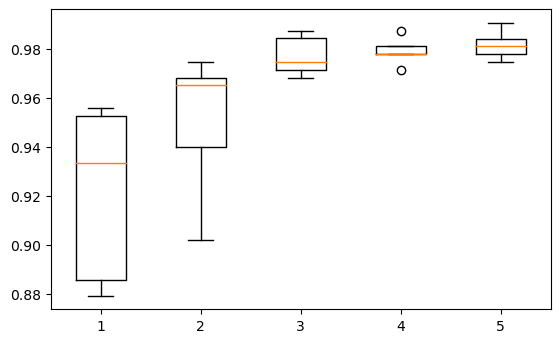

In [554]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [555]:
#choose max_depth = 5, because it has the highest accuracy and a very tight boxplot range.
from sklearn.metrics import accuracy_score
# max_depth=5 on validation set:
start_time = time.time()
X = df_MY.loc[:,1:]
y = df_MY.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy for max_depth=5 is ",accuracy_score(y_test, model.predict(X_test)))
print("max_depth=5 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['DT_pair2'] = accuracy_score(y_test, model.predict(X_test))
time_test['DT_pair2'] = time.time() - start_time

Accuracy for max_depth=5 is  0.9873417721518988
max_depth=5 --- 0.010708093643188477 seconds ---


## Decision Tree(pair3)

In [556]:
warnings.filterwarnings('ignore')
accuracy = []
dt_accuracy = []
time_dict['dt_CZ'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation(df_CZ,DecisionTreeClassifier(max_depth=i)))
    dt_accuracy.append(mean(cross_validation(df_CZ,DecisionTreeClassifier(max_depth=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['dt_CZ'].append(time.time() - start_time)
accuracy_dict['dt_CZ'] = dt_accuracy
print(dt_accuracy)

n =  1  --- 0.04987001419067383 seconds ---
n =  2  --- 0.05287504196166992 seconds ---
n =  3  --- 0.049182891845703125 seconds ---
n =  4  --- 0.04144573211669922 seconds ---
n =  5  --- 0.04108905792236328 seconds ---
[0.882312925170068, 0.9156462585034013, 0.9482993197278912, 0.9659863945578231, 0.9714285714285714]


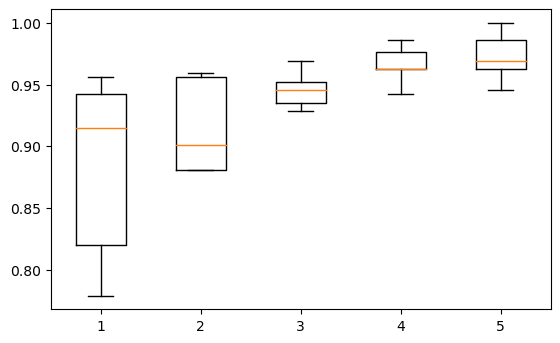

In [557]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [558]:
#choose max_depth = 4, because it has a very high accuracy and a very tight boxplot range overall.
from sklearn.metrics import accuracy_score
# max_depth=4 on validation set:
start_time = time.time()
X = df_CZ.loc[:,1:]
y = df_CZ.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy for max_depth=4 is ",accuracy_score(y_test, model.predict(X_test)))
print("max_depth=4 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['DT_pair3'] = accuracy_score(y_test, model.predict(X_test))
time_test['DT_pair3'] = time.time() - start_time

Accuracy for max_depth=4 is  0.9727891156462585
max_depth=4 --- 0.010009050369262695 seconds ---


## SVM (pair 1)

In [559]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

In [560]:
#Train test split
X = df_HK.loc[:,1:]
y = df_HK.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

svc = SVC()
# Define the search space
param_grid = { 
    # Kernel type
    "kernel": ['rbf', 'poly','sigmoid'],
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [561]:
# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'poly', 'sigmoid']},
             refit='accuracy', scoring=['accuracy'])

In [562]:
grid_result.cv_results_

{'mean_fit_time': array([0.04616189, 0.04271474, 0.11665039]),
 'std_fit_time': array([0.00264003, 0.00350415, 0.02694763]),
 'mean_score_time': array([0.01921358, 0.00504107, 0.01891322]),
 'std_score_time': array([0.00193555, 0.00134903, 0.00255253]),
 'param_kernel': masked_array(data=['rbf', 'poly', 'sigmoid'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf'}, {'kernel': 'poly'}, {'kernel': 'sigmoid'}],
 'split0_test_accuracy': array([0.95849057, 0.96226415, 0.74339623]),
 'split1_test_accuracy': array([0.96226415, 0.98490566, 0.61886792]),
 'split2_test_accuracy': array([0.96226415, 0.97735849, 0.69811321]),
 'split3_test_accuracy': array([0.95849057, 0.97358491, 0.49811321]),
 'split4_test_accuracy': array([0.96603774, 0.97358491, 0.49811321]),
 'mean_test_accuracy': array([0.96150943, 0.97433962, 0.61132075]),
 'std_test_accuracy': array([0.00282389, 0.00731725, 0.10066352]),
 'rank_test_accuracy': array(

In [563]:
df_accuracy = pd.DataFrame(list(grid_result.cv_results_.values())[6:11],columns=['rbf','poly','sigmoid'])
df_accuracy

,rbf,poly,sigmoid
0,0.958491,0.962264,0.743396
1,0.962264,0.984906,0.618868
2,0.962264,0.977358,0.698113
3,0.958491,0.973585,0.498113
4,0.966038,0.973585,0.498113


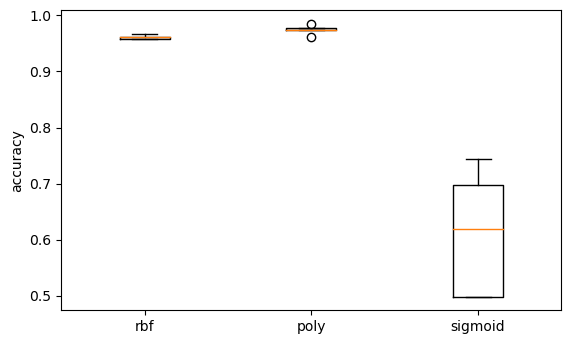

In [564]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(df_accuracy,labels=['rbf','poly','sigmoid'])
plt.ylabel('accuracy')
plt.show()

In [565]:
#Print the list of fit time for the training dataset
time_dict['SVM_HK'] = []
kernel = ['rbf','poly','sigmoid']
# time_dict['dt_HK'].append(time.time() - start_time)
# accuracy_dict['dt_HK'] = dt_accuracy
for i in range(3):
    print('The fit time for {} is {}'.format(kernel[i],grid_result.cv_results_['mean_fit_time'][i]))
    time_dict['SVM_HK'].append(grid_result.cv_results_['mean_fit_time'][i])
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, y_test):.4f}')
accuracy_dict['SVM_HK'] = grid_result.cv_results_['split0_test_accuracy']

The fit time for rbf is 0.04616189002990723
The fit time for poly is 0.0427147388458252
The fit time for sigmoid is 0.116650390625
The best accuracy score for the training dataset is 0.9743
The best hyperparameters are {'kernel': 'poly'}
The accuracy score for the testing dataset is 0.9527


We will choose poly as the best kernel because it has the biggest accuracy value with a tight boxplot range. 
In addition, grid_result.best_params_ gives the same answer.

In [566]:
from sklearn.metrics import accuracy_score
# kernel='poly' on validation set:
start_time = time.time()
X = df_HK.loc[:,1:]
y = df_HK.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = SVC(kernel='poly').fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy for ",grid_result.best_params_, "is ",accuracy_score(y_test, model.predict(X_test)))
print(grid_result.best_params_, " --- %s seconds ---" % (time.time() - start_time))
accuracy_test['SVM_pair1'] = accuracy_score(y_test, model.predict(X_test))
time_test['SVM_pair1'] = time.time() - start_time

Accuracy for  {'kernel': 'poly'} is  0.9527027027027027
{'kernel': 'poly'}  --- 0.030009984970092773 seconds ---


## SVM (pair 2)

In [567]:
#Train test split
X = df_MY.loc[:,1:]
y = df_MY.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

svc = SVC()
# Define the search space
param_grid = { 
    # Kernel type
    "kernel": ['rbf', 'poly','sigmoid'],
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [568]:
# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'poly', 'sigmoid']},
             refit='accuracy', scoring=['accuracy'])

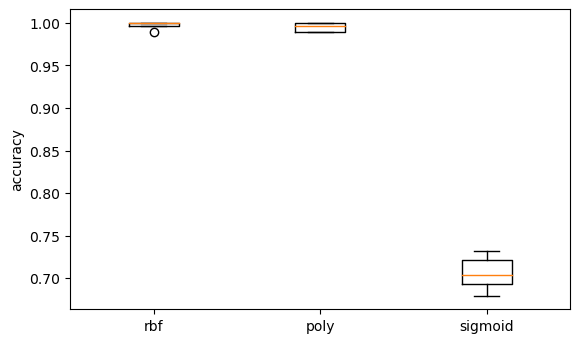

In [569]:
df_accuracy = pd.DataFrame(list(grid_result.cv_results_.values())[6:11],columns=['rbf','poly','sigmoid'])
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(df_accuracy,labels=['rbf','poly','sigmoid'])
plt.ylabel('accuracy')
plt.show()

In [570]:
#Print the list of fit time for the training dataset
time_dict['SVM_MY'] = []
kernel = ['rbf','poly','sigmoid']
for i in range(3):
    print('The fit time for {} is {}'.format(kernel[i],grid_result.cv_results_['mean_fit_time'][i]))
    time_dict['SVM_MY'].append(grid_result.cv_results_['mean_fit_time'][i])

# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, y_test):.4f}')
accuracy_dict['SVM_MY'] = grid_result.cv_results_['split0_test_accuracy']

The fit time for rbf is 0.008197021484375
The fit time for poly is 0.0073529243469238285
The fit time for sigmoid is 0.095436429977417
The best accuracy score for the training dataset is 0.9972
The best hyperparameters are {'kernel': 'rbf'}
The accuracy score for the testing dataset is 1.0000


We will choose rbf as the best kernel because it has the biggest accuracy value with a tight boxplot range. 
In addition, grid_result.best_params_ gives the same answer.

In [571]:
from sklearn.metrics import accuracy_score
# kernel='poly' on validation set:
start_time = time.time()
X = df_MY.loc[:,1:]
y = df_MY.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = SVC(kernel='rbf').fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy for ",grid_result.best_params_, "is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print(grid_result.best_params_, " --- %s seconds ---" % (time.time() - start_time))
accuracy_test['SVM_pair2'] = accuracy_score(y_test, model.predict(X_test))
time_test['SVM_pair2'] = time.time() - start_time

Accuracy for  {'kernel': 'rbf'} is  1.0
{'kernel': 'rbf'}  --- 0.018035173416137695 seconds ---


## SVM pair 3

In [572]:
#Train test split
X = df_CZ.loc[:,1:]
y = df_CZ.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

svc = SVC()
# Define the search space
param_grid = { 
    # Kernel type
    "kernel": ['rbf', 'poly','sigmoid'],
    }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [573]:
# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'poly', 'sigmoid']},
             refit='accuracy', scoring=['accuracy'])

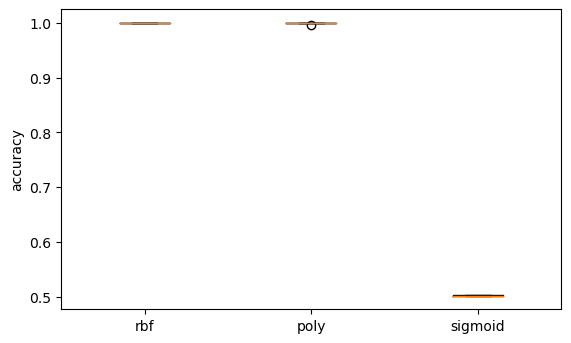

In [574]:
df_accuracy = pd.DataFrame(list(grid_result.cv_results_.values())[6:11],columns=['rbf','poly','sigmoid'])
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(df_accuracy,labels=['rbf','poly','sigmoid'])
plt.ylabel('accuracy')
plt.show()

In [575]:
#Print the list of fit time for the training dataset
time_dict['SVM_CZ'] = []

kernel = ['rbf','poly','sigmoid']
for i in range(3):
    print('The fit time for {} is {}'.format(kernel[i],grid_result.cv_results_['mean_fit_time'][i]))
    time_dict['SVM_CZ'].append(grid_result.cv_results_['mean_fit_time'][i])

# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, y_test):.4f}')
accuracy_dict['SVM_CZ'] = grid_result.cv_results_['split0_test_accuracy']


The fit time for rbf is 0.008055496215820312
The fit time for poly is 0.005446577072143554
The fit time for sigmoid is 0.07708501815795898
The best accuracy score for the training dataset is 1.0000
The best hyperparameters are {'kernel': 'rbf'}
The accuracy score for the testing dataset is 1.0000


We will choose rbf as the best kernel because it has the biggest accuracy value with a tight boxplot range. 
In addition, grid_result.best_params_ gives the same answer.

In [576]:
from sklearn.metrics import accuracy_score
# kernel='poly' on validation set:
start_time = time.time()
X = df_CZ.loc[:,1:]
y = df_CZ.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = SVC(kernel='rbf').fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy for ",grid_result.best_params_, "is ",accuracy_score(y_test, model.predict(X_test)))
print(grid_result.best_params_, " --- %s seconds ---" % (time.time() - start_time))
accuracy_test['SVM_pair3'] = accuracy_score(y_test, model.predict(X_test))
time_test['SVM_pair3'] = time.time() - start_time

Accuracy for  {'kernel': 'rbf'} is  1.0
{'kernel': 'rbf'}  --- 0.024997234344482422 seconds ---


# Optional extension 3 – Consider more classification models

## KNN Multi-class

In [577]:
warnings.filterwarnings('ignore')
accuracy = []
knn_accuracy = []
time_dict['knn_multi'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation(df,KNeighborsClassifier(n_neighbors=i)))
    knn_accuracy.append(mean(cross_validation(df,KNeighborsClassifier(n_neighbors=i))))
    print("k = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['knn_multi'].append(time.time() - start_time)
accuracy_dict['knn_multi'] = knn_accuracy
print(knn_accuracy)

k =  1  --- 9.135568141937256 seconds ---
k =  2  --- 8.763498067855835 seconds ---
k =  3  --- 10.65313982963562 seconds ---
k =  4  --- 12.15618896484375 seconds ---
k =  5  --- 12.393649101257324 seconds ---
[0.95675, 0.943, 0.95195, 0.95065, 0.95155]


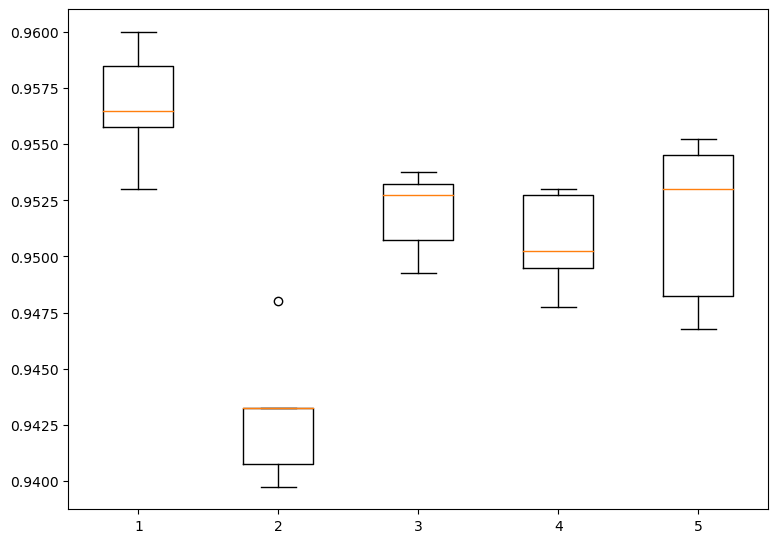

In [580]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [581]:
#choose k = 1 because it has the highest accuracy and a relatively tight boxplot range.
from sklearn.metrics import accuracy_score
# k = 1 on validation set:
start_time = time.time()
X = df.loc[:,1:]
y = df.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for k = 1 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("k = 1 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['knn_multi'] = accuracy_score(y_test, model.predict(X_test))
time_test['knn_multi'] = time.time() - start_time

Accuracy for k = 1 is  0.956
k = 1 --- 0.9708099365234375 seconds ---


# #Random Forest multi-class

In [582]:
warnings.filterwarnings('ignore')
accuracy = []
rf_accuracy = []
time_dict['rf_multi'] = []
estimator_list = [10,20,30,40,50]
for i in estimator_list:
    start_time = time.time()
    accuracy.append(cross_validation(df,RandomForestClassifier(n_estimators=i)))
    rf_accuracy.append(mean(cross_validation(df,RandomForestClassifier(n_estimators=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['rf_multi'].append(time.time() - start_time)
accuracy_dict['rf_multi'] = rf_accuracy
print(rf_accuracy)

n =  10  --- 1.8875839710235596 seconds ---
n =  20  --- 3.7267520427703857 seconds ---
n =  30  --- 5.347146034240723 seconds ---
n =  40  --- 6.838735103607178 seconds ---
n =  50  --- 8.073830842971802 seconds ---
[0.9359, 0.95215, 0.9564, 0.9591500000000001, 0.96085]


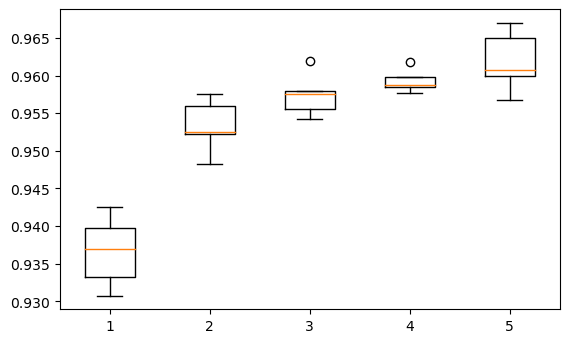

In [583]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [584]:
#choose the second, n = 40, because it has a relatively high accuracy and a very tight boxplot range. In addition, 
#as we can observe, there is little accuracy increase from 40 to 50, so it would be a less expensive choice to stop 
#at n = 40.
from sklearn.metrics import accuracy_score
# n = 40 on validation set:
start_time = time.time()
X = df.loc[:,1:]
y = df.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = RandomForestClassifier(n_estimators=40).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for n = 40 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("n = 40 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['rf_multi'] = accuracy_score(y_test, model.predict(X_test))
time_test['rf_multi'] = time.time() - start_time

Accuracy for n = 40 is  0.961
n = 40 --- 0.8112220764160156 seconds ---


# Dimension Reduction

## PCA KNN(pair 1)

In [585]:
from sklearn import decomposition, datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

In [586]:
df_HK

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,H,4,5,5,4,4,7,7,6,6,7,6,8,3,8,3,8
1,H,6,9,8,7,6,8,6,6,7,7,7,9,6,8,4,8
2,H,3,3,4,1,2,8,7,5,6,7,6,8,5,8,3,7
3,H,3,5,5,4,3,7,8,3,6,10,6,8,3,8,3,8
4,H,8,12,8,6,4,9,8,4,5,8,4,5,6,9,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,K,7,9,8,5,4,5,8,4,6,10,11,11,6,12,4,7
1469,K,5,9,5,4,2,7,7,3,6,9,8,9,6,11,3,7
1470,K,7,14,8,8,5,9,6,3,5,11,3,7,5,7,4,8
1471,K,3,1,5,3,3,6,7,4,8,7,6,11,3,8,5,9


In [587]:
# std_slc = StandardScaler()
X = df_HK.loc[:,1:]
y = df_HK.loc[:,0]
# X_std = std_slc.fit_transform(X)
pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca)
df_pca = pd.DataFrame(X_pca)
# print(df_pca)

(1473, 4)
[[ 2.22174383 -1.19890474 -0.72664942 -0.94667088]
 [-3.79481952  2.10002446 -0.10746407 -0.33271212]
 [ 4.42163772 -4.20210656 -1.64977553 -1.9034165 ]
 ...
 [-7.73453561  3.36194963 -1.75062613 -2.80873931]
 [ 3.27742613 -6.18677341 -0.62463166  1.60694844]
 [-0.19863201  5.00991357  1.57472357  4.10136952]]


In [588]:
def cross_validation_pca(df_X,df,model):
    X = df_X
    y = df.loc[:,0]
    kf = KFold(n_splits=5)
    score = []
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index], \
                                            y.iloc[train_index],y.iloc[test_index]
        score.append(get_score((model),X_train, X_test, y_train, y_test))
    return score

In [589]:
warnings.filterwarnings('ignore')
accuracy = []
knn_accuracy = []
time_dict['PCA_knn_HK'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation_pca(df_pca,df_HK,KNeighborsClassifier(n_neighbors=i)))
    knn_accuracy.append(mean(cross_validation_pca(df_pca,df_HK,KNeighborsClassifier(n_neighbors=i))))
    print("k = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['PCA_knn_HK'].append(time.time() - start_time)
accuracy_dict['PCA_knn_HK'] = knn_accuracy
print(knn_accuracy)

k =  1  --- 0.1471080780029297 seconds ---
k =  2  --- 0.09793519973754883 seconds ---
k =  3  --- 0.09275317192077637 seconds ---
k =  4  --- 0.10971283912658691 seconds ---
k =  5  --- 0.09470105171203613 seconds ---
[0.8506122448979592, 0.855270379338176, 0.8533310273261847, 0.8525723509742881, 0.8444851839040701]


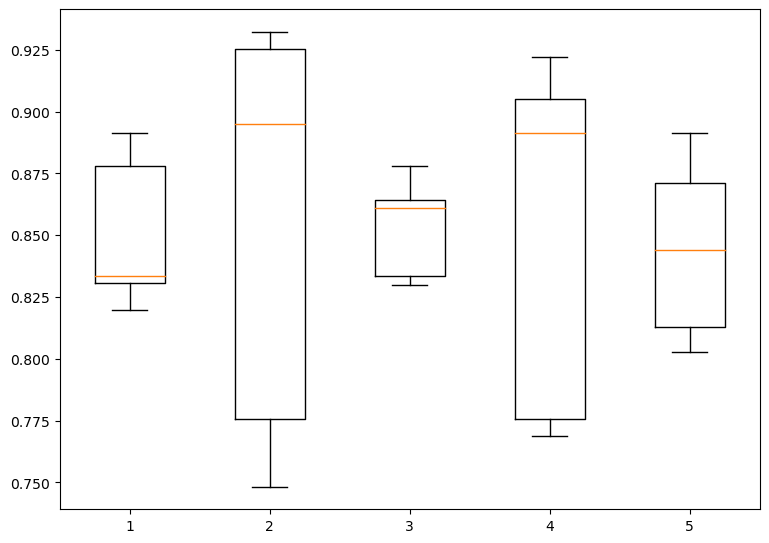

In [590]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [591]:
#choose k = 2 because it has the highest accuracy with a short running time.

In [592]:
from sklearn.metrics import accuracy_score
# k = 2 on validation set:
start_time = time.time()
X = df_pca.loc[:,1:]
y = df_HK.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for k = 2 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("k = 2 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['PCA_knn_pair1'] = accuracy_score(y_test, model.predict(X_test))
time_test['PCA_knn_pair1'] = time.time() - start_time

Accuracy for k = 2 is  0.7972972972972973
k = 2 --- 0.02367997169494629 seconds ---


## PCA KNN(pair 2)

In [593]:
# std_slc = StandardScaler()
X = df_MY.loc[:,1:]
y = df_MY.loc[:,0]
# X_std = std_slc.fit_transform(X)
pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca)
df_pca = pd.DataFrame(X_pca)
# print(df_pca)

(1578, 4)
[[15.98288913 -1.69516675  0.15510644 -7.27913942]
 [ 7.07378756 -3.11029448 -1.96716763  3.51230514]
 [ 6.61924946 -6.45500609  0.84734455 -1.46461401]
 ...
 [-5.31745664 -2.66566614  5.84847774  0.89669456]
 [-2.86420512 -3.3674364   0.3311286  -2.19845436]
 [-4.61207108 -3.72465328  0.68759044  0.68160882]]


In [594]:
warnings.filterwarnings('ignore')
accuracy = []
knn_accuracy = []
time_dict['PCA_knn_MY'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation_pca(df_pca,df_MY,KNeighborsClassifier(n_neighbors=i)))
    knn_accuracy.append(mean(cross_validation_pca(df_pca,df_MY,KNeighborsClassifier(n_neighbors=i))))
    print("k = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['PCA_knn_MY'].append(time.time() - start_time)
accuracy_dict['PCA_knn_MY'] = knn_accuracy
print(knn_accuracy)

k =  1  --- 0.13643908500671387 seconds ---
k =  2  --- 0.10055017471313477 seconds ---
k =  3  --- 0.10057902336120605 seconds ---
k =  4  --- 0.131547212600708 seconds ---
k =  5  --- 0.13161587715148926 seconds ---
[0.9740084388185654, 0.9714567008237894, 0.9752762708458911, 0.9720976491862569, 0.970839863371509]


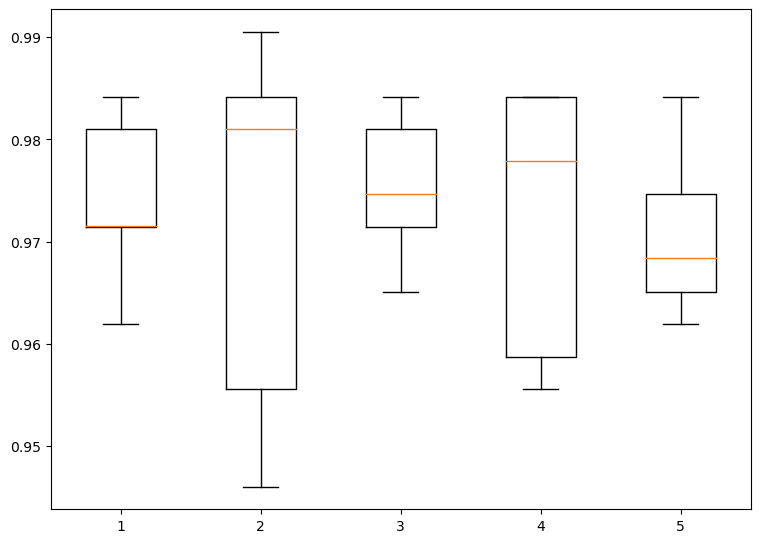

In [595]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [596]:
#choose k = 2 because it has the highest accuracy with a short running time.

# k = 2 on validation set:
start_time = time.time()
X = df_pca.loc[:,1:]
y = df_MY.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for k = 2 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("k = 2 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['PCA_knn_pair2'] = accuracy_score(y_test, model.predict(X_test))
time_test['PCA_knn_pair2'] = time.time() - start_time

Accuracy for k = 2 is  0.8354430379746836
k = 2 --- 0.018266677856445312 seconds ---


## PCA KNN(pair 3)

In [597]:
# std_slc = StandardScaler()
X = df_CZ.loc[:,1:]
y = df_CZ.loc[:,0]
# X_std = std_slc.fit_transform(X)
pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca)
df_pca = pd.DataFrame(X_pca)
# print(df_pca)

(1470, 4)
[[ 2.40468162  2.51486187 -1.78675028 -0.59559149]
 [ 3.06522143  3.56890103 -2.9440474   6.85729382]
 [ 2.55652123  0.97231593  0.15556602 -2.54929184]
 ...
 [ 1.14305426 -4.72588376 -5.1073319   1.73599676]
 [ 3.54571033 -4.64063411 -5.89188224  3.00934829]
 [-3.3018056  -2.96091232  1.33735572  1.96778979]]


In [598]:
warnings.filterwarnings('ignore')
accuracy = []
knn_accuracy = []
time_dict['PCA_knn_CZ'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation_pca(df_pca,df_CZ,KNeighborsClassifier(n_neighbors=i)))
    knn_accuracy.append(mean(cross_validation_pca(df_pca,df_CZ,KNeighborsClassifier(n_neighbors=i))))
    print("k = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['PCA_knn_CZ'].append(time.time() - start_time)
accuracy_dict['PCA_knn_CZ'] = knn_accuracy
print(knn_accuracy)

k =  1  --- 0.12921810150146484 seconds ---
k =  2  --- 0.10257220268249512 seconds ---
k =  3  --- 0.09403777122497559 seconds ---
k =  4  --- 0.10668396949768066 seconds ---
k =  5  --- 0.09595704078674316 seconds ---
[0.9965986394557823, 0.9952380952380953, 0.9952380952380953, 0.9972789115646259, 0.9952380952380953]


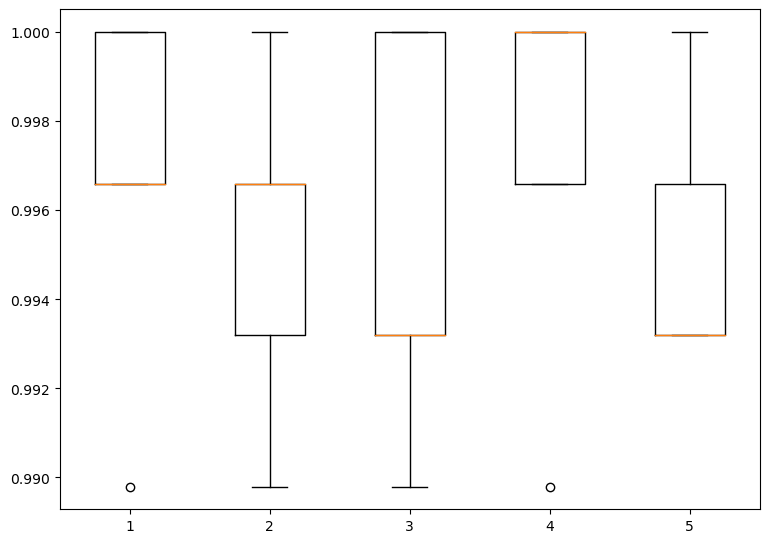

In [599]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [600]:
#choose k = 4 because it has the highest accuracy and a relatively tight boxplot expansion.
from sklearn.metrics import accuracy_score
# k = 4 on validation set:
start_time = time.time()
X = df_pca.loc[:,1:]
y = df_CZ.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for k = 4 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("k = 4 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['PCA_knn_pair3'] = accuracy_score(y_test, model.predict(X_test))
time_test['PCA_knn_pair3'] = time.time() - start_time

Accuracy for k = 4 is  0.9931972789115646
k = 4 --- 0.01740288734436035 seconds ---


## PCA Random Forest (pair 1)

In [601]:
# std_slc = StandardScaler()
X = df_HK.loc[:,1:]
y = df_HK.loc[:,0]
# X_std = std_slc.fit_transform(X)
pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca)
df_pca = pd.DataFrame(X_pca)
# print(df_pca)

(1473, 4)
[[ 2.22174383 -1.19890474 -0.72664933 -0.94667103]
 [-3.79481953  2.10002444 -0.10746182 -0.33271939]
 [ 4.42163772 -4.20210657 -1.64977456 -1.90341961]
 ...
 [-7.7345356   3.36194964 -1.75062686 -2.80873706]
 [ 3.27742612 -6.18677343 -0.62463002  1.60694291]
 [-0.198632    5.00991358  1.57472247  4.10137321]]


In [602]:
warnings.filterwarnings('ignore')
accuracy = []
rf_accuracy = []
time_dict['PCA_rf_HK'] = []
estimator_list = [10,20,30,40,50]
for i in estimator_list:
    start_time = time.time()
    accuracy.append(cross_validation_pca(df_pca,df_HK,RandomForestClassifier(n_estimators=i)))
    rf_accuracy.append(mean(cross_validation_pca(df_pca,df_HK,RandomForestClassifier(n_estimators=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['PCA_rf_HK'].append(time.time() - start_time)
accuracy_dict['PCA_rf_HK'] = rf_accuracy
print(rf_accuracy)

n =  10  --- 0.2452831268310547 seconds ---
n =  20  --- 0.4348621368408203 seconds ---
n =  30  --- 0.646306037902832 seconds ---
n =  40  --- 0.8377847671508789 seconds ---
n =  50  --- 0.9693129062652588 seconds ---
[0.828202467427649, 0.8275221953188054, 0.8336285022483569, 0.8356647065605903, 0.8275198893116569]


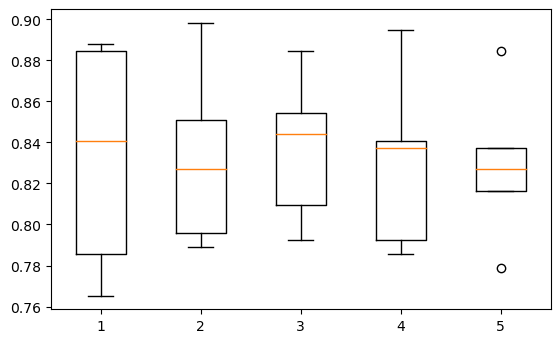

In [603]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [604]:
#choose the third, n = 30, because it has a relatively high accuracy and the tightest boxplot range.

# n = 30 on validation set:
start_time = time.time()
X = df_pca.loc[:,1:]
y = df_HK.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = RandomForestClassifier(n_estimators=30).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for n = 30 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("n = 30 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['PCA_rf_pair1'] = accuracy_score(y_test, model.predict(X_test))
time_test['PCA_rf_pair1'] = time.time() - start_time

Accuracy for n = 30 is  0.8445945945945946
n = 30 --- 0.08349013328552246 seconds ---


## PCA Random Forest (pair 2)

In [605]:
# std_slc = StandardScaler()
X = df_MY.loc[:,1:]
y = df_MY.loc[:,0]
# X_std = std_slc.fit_transform(X)
pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca)
df_pca = pd.DataFrame(X_pca)
# print(df_pca)

(1578, 4)
[[15.98288913 -1.69516679  0.15511216 -7.27913576]
 [ 7.07378754 -3.11029467 -1.96716254  3.51224772]
 [ 6.61924944 -6.45500639  0.84736107 -1.46466666]
 ...
 [-5.31745666 -2.66566637  5.84848993  0.89665133]
 [-2.86420512 -3.36743649  0.33113257 -2.19847691]
 [-4.61207107 -3.72465324  0.68759114  0.68162696]]


In [606]:
warnings.filterwarnings('ignore')
accuracy = []
rf_accuracy = []
time_dict['PCA_rf_MY'] = []
estimator_list = [10,20,30,40,50]
for i in estimator_list:
    start_time = time.time()
    accuracy.append(cross_validation_pca(df_pca,df_MY,RandomForestClassifier(n_estimators=i)))
    rf_accuracy.append(mean(cross_validation_pca(df_pca,df_MY,RandomForestClassifier(n_estimators=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['PCA_rf_MY'].append(time.time() - start_time)
accuracy_dict['PCA_rf_MY'] = rf_accuracy
print(rf_accuracy)

n =  10  --- 0.23204374313354492 seconds ---
n =  20  --- 0.3687901496887207 seconds ---
n =  30  --- 0.5556261539459229 seconds ---
n =  40  --- 0.7307910919189453 seconds ---
n =  50  --- 0.9356799125671387 seconds ---
[0.9714707655213984, 0.9740124573035965, 0.9771830419931685, 0.972748643761302, 0.9765501306007635]


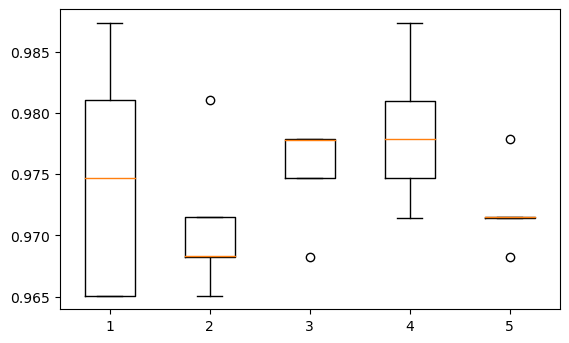

In [607]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [608]:
#choose the forth, n = 40, because it has the highest accuracy and the tightest boxplot range.

# n = 40 on validation set:
start_time = time.time()
X = df_pca.loc[:,1:]
y = df_MY.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = RandomForestClassifier(n_estimators=40).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for n = 40 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("n = 40 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['PCA_rf_pair2'] = accuracy_score(y_test, model.predict(X_test))
time_test['PCA_rf_pair2'] = time.time() - start_time

Accuracy for n = 40 is  0.8481012658227848
n = 40 --- 0.0996859073638916 seconds ---


## PCA Random Forest (pair 3)

In [609]:
# std_slc = StandardScaler()
X = df_CZ.loc[:,1:]
y = df_CZ.loc[:,0]
# X_std = std_slc.fit_transform(X)
pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca)
df_pca = pd.DataFrame(X_pca)
# print(df_pca)

(1470, 4)
[[ 2.40468158  2.51486168 -1.78675144 -0.59559637]
 [ 3.06522163  3.56890179 -2.94404251  6.85731966]
 [ 2.55652116  0.97231564  0.15556426 -2.54930053]
 ...
 [ 1.14305424 -4.7258838  -5.10733216  1.7359951 ]
 [ 3.54571035 -4.64063401 -5.89188163  3.00935136]
 [-3.30180562 -2.96091237  1.3373553   1.96778719]]


In [610]:
warnings.filterwarnings('ignore')
accuracy = []
rf_accuracy = []
time_dict['PCA_knn_CZ'] = []
estimator_list = [10,20,30,40,50]
for i in estimator_list:
    start_time = time.time()
    accuracy.append(cross_validation_pca(df_pca,df_CZ,RandomForestClassifier(n_estimators=i)))
    rf_accuracy.append(mean(cross_validation_pca(df_pca,df_CZ,RandomForestClassifier(n_estimators=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['PCA_knn_CZ'].append(time.time() - start_time)
accuracy_dict['PCA_knn_CZ'] = rf_accuracy
print(rf_accuracy)

n =  10  --- 0.20940279960632324 seconds ---
n =  20  --- 0.29584217071533203 seconds ---
n =  30  --- 0.4913358688354492 seconds ---
n =  40  --- 0.5785400867462158 seconds ---
n =  50  --- 0.7444958686828613 seconds ---
[0.9952380952380953, 0.9952380952380953, 0.9952380952380953, 0.9952380952380953, 0.9952380952380953]


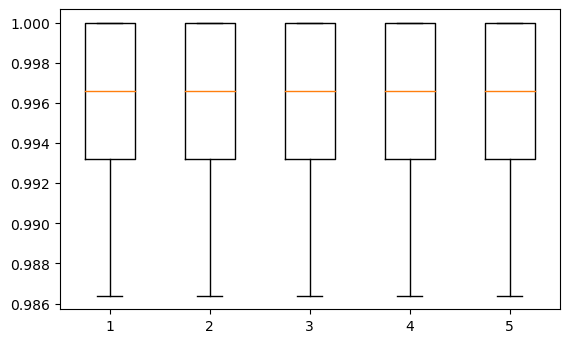

In [611]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [612]:
#choose the second, n = 20, because it has a relatively high accuracy and a relatively tight boxplot range.

# n = 20 on validation set:
start_time = time.time()
X = df_pca.loc[:,1:]
y = df_CZ.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = RandomForestClassifier(n_estimators=20).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for n = 20 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("n = 20 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['PCA_rf_pair3'] = accuracy_score(y_test, model.predict(X_test))
time_test['PCA_rf_pair3'] = time.time() - start_time

Accuracy for n = 20 is  0.9931972789115646
n = 20 --- 0.0459439754486084 seconds ---


## PCA KNN multi-class

In [615]:
# std_slc = StandardScaler()
X = df.loc[:,1:]
y = df.loc[:,0]
# X_std = std_slc.fit_transform(X)
pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca)
df_pca = pd.DataFrame(X_pca)
# print(df_pca)

(20000, 4)
[[-3.81809063  5.57464822 -2.21938314  0.09467682]
 [ 2.95817463 -3.46925408 -3.58511729 -2.41149788]
 [ 4.88510317 -2.83614995 -3.8694835  -3.14087459]
 ...
 [ 2.6601273   7.3781986  -2.43651833 -0.32886173]
 [-5.74806126 -0.69130293 -3.62635301 -0.49394953]
 [ 0.83470661 -4.60354321 -1.06670602 -5.04201292]]


In [616]:
warnings.filterwarnings('ignore')
accuracy = []
knn_accuracy = []
time_dict['PCA_knn_multi'] = []
for i in range(1,6):
    start_time = time.time()
    accuracy.append(cross_validation_pca(df_pca,df,KNeighborsClassifier(n_neighbors=i)))
    knn_accuracy.append(mean(cross_validation_pca(df_pca,df,KNeighborsClassifier(n_neighbors=i))))
    print("k = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['PCA_knn_multi'].append(time.time() - start_time)
accuracy_dict['PCA_knn_multi'] = knn_accuracy
print(knn_accuracy)

k =  1  --- 1.1713171005249023 seconds ---
k =  2  --- 1.2239949703216553 seconds ---
k =  3  --- 1.1715540885925293 seconds ---
k =  4  --- 1.1752898693084717 seconds ---
k =  5  --- 1.3088347911834717 seconds ---
[0.60325, 0.5799, 0.60035, 0.60515, 0.61135]


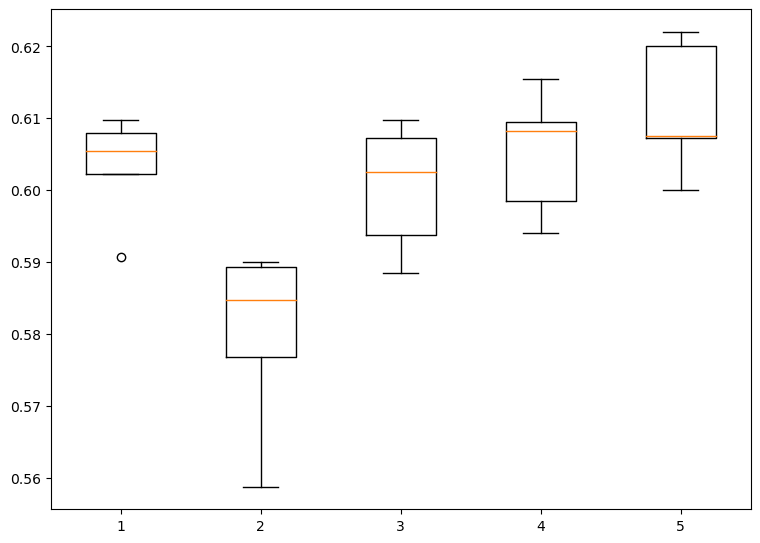

In [617]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [618]:
#choose k = 4 because it has the highest accuracy and a relatively tight boxplot expansion.

# k = 4 on validation set:
start_time = time.time()
X = df_pca.loc[:,1:]
y = df.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for k = 4 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("k = 4 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['PCA_knn_multi'] = accuracy_score(y_test, model.predict(X_test))
time_test['PCA_knn_multi'] = time.time() - start_time

Accuracy for k = 4 is  0.564
k = 4 --- 0.16228914260864258 seconds ---


## PCA Random Forest multi-class

In [619]:
# std_slc = StandardScaler()
X = df.loc[:,1:]
y = df.loc[:,0]
# X_std = std_slc.fit_transform(X)
pca = decomposition.PCA(n_components=4)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
print(X_pca)
df_pca = pd.DataFrame(X_pca)
# print(df_pca)

(20000, 4)
[[-3.81809068  5.57462698 -2.21937959  0.09475427]
 [ 2.95817457 -3.46921801 -3.58511765 -2.41159898]
 [ 4.88510296 -2.83615221 -3.8694801  -3.14086011]
 ...
 [ 2.66012722  7.37819888 -2.43651485 -0.32884241]
 [-5.74806119 -0.69131062 -3.62635521 -0.49394092]
 [ 0.83470683 -4.60355922 -1.06670963 -5.04198139]]


In [620]:
warnings.filterwarnings('ignore')
accuracy = []
rf_accuracy = []
time_dict['PCA_rf_multi'] = []
estimator_list = [10,20,30,40,50]
for i in estimator_list:
    start_time = time.time()
    accuracy.append(cross_validation_pca(df_pca,df,RandomForestClassifier(n_estimators=i)))
    rf_accuracy.append(mean(cross_validation_pca(df_pca,df,RandomForestClassifier(n_estimators=i))))
    print("n = ", i, " --- %s seconds ---" % (time.time() - start_time))
    time_dict['PCA_rf_multi'].append(time.time() - start_time)
accuracy_dict['PCA_rf_multi'] = rf_accuracy
print(rf_accuracy)

n =  10  --- 4.993187189102173 seconds ---
n =  20  --- 7.630398273468018 seconds ---
n =  30  --- 11.152652025222778 seconds ---
n =  40  --- 15.778745889663696 seconds ---
n =  50  --- 17.933342933654785 seconds ---
[0.627, 0.638, 0.6454, 0.6471, 0.6514]


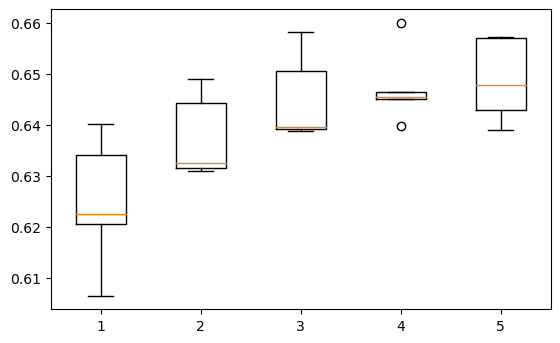

In [621]:
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes([0,0,1,1])
bp = ax.boxplot(accuracy)
plt.show()

In [622]:
#choose the third, n = 40, because it has a relatively high accuracy and the tightest boxplot range. In addition, 
#there is little increase from 40 to 50, so we choose n = 40 as a lesse expensive choice with less time cost.

# n = 40 on validation set:
start_time = time.time()
X = df_pca.loc[:,1:]
y = df.loc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model = RandomForestClassifier(n_estimators=40).fit(X_train,y_train)
y_pred = model.predict(X_test)
# score = cross_val_score(model, X,y,cv=5)
print("Accuracy for n = 40 is ",accuracy_score(y_test, model.predict(X_test)))
# print("Score: ",score)
# print("The average score is ",mean(score))
print("n = 40 --- %s seconds ---" % (time.time() - start_time))
accuracy_test['PCA_rf_multi'] = accuracy_score(y_test, model.predict(X_test))
time_test['PCA_rf_multi'] = time.time() - start_time

Accuracy for n = 40 is  0.578
n = 40 --- 1.1860811710357666 seconds ---


In [629]:
df_accuracy_test = pd.DataFrame(accuracy_test,index=[0])
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_accuracy_test)


   KNN_pair1  KNN_pair2  KNN_pair3  RF_pair1  RF_pair2  RF_pair3  DT_pair1  \
0      0.953        1.0        1.0     0.966       1.0       1.0     0.912   

   DT_pair2  DT_pair3  SVM_pair1  SVM_pair2  SVM_pair3  knn_multi  rf_multi  \
0     0.987     0.973      0.953        1.0        1.0      0.956     0.961   

   PCA_knn_pair1  PCA_knn_pair2  PCA_knn_pair3  PCA_rf_pair1  PCA_rf_pair2  \
0          0.797          0.835          0.993         0.845         0.848   

   PCA_rf_pair3  PCA_knn_multi  PCA_rf_multi  
0         0.993          0.564         0.578  


In [630]:
df_time_test = pd.DataFrame(time_test,index=[0])
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_time_test)

   KNN_pair1  KNN_pair2  KNN_pair3  RF_pair1  RF_pair2  RF_pair3  DT_pair1  \
0      0.028       0.03      0.029     0.058     0.076     0.078     0.012   

   DT_pair2  DT_pair3  SVM_pair1  SVM_pair2  SVM_pair3  knn_multi  rf_multi  \
0     0.012     0.012      0.032      0.021      0.028      1.433     0.837   

   PCA_knn_pair1  PCA_knn_pair2  PCA_knn_pair3  PCA_rf_pair1  PCA_rf_pair2  \
0           0.03          0.025          0.024          0.09         0.106   

   PCA_rf_pair3  PCA_knn_multi  PCA_rf_multi  
0         0.052          0.228         1.218  


In [514]:
# time_df = pd.DataFrame(time_dict)
time_dict['SVM_HK'].append(None)
time_dict['SVM_HK'].append(None)
time_dict['SVM_MY'].append(None)
time_dict['SVM_MY'].append(None)
time_dict['SVM_CZ'].append(None)
time_dict['SVM_CZ'].append(None)
time_dict

{'KNN_HK': [0.15439510345458984,
  0.11513400077819824,
  0.12064695358276367,
  0.12924528121948242,
  0.14127898216247559],
 'KNN_MY': [0.16219186782836914,
  0.1408219337463379,
  0.1427593231201172,
  0.15739178657531738,
  0.18216395378112793],
 'KNN_CZ': [0.15004682540893555,
  0.1176292896270752,
  0.12232303619384766,
  0.13789010047912598,
  0.14607000350952148],
 'rf_HK': [0.21732211112976074,
  0.3180830478668213,
  0.48232126235961914,
  0.6043601036071777,
  0.7319719791412354],
 'rf_MY': [0.20104503631591797,
  0.2884669303894043,
  0.4392979145050049,
  0.5489978790283203,
  0.6464779376983643],
 'rf_CZ': [0.2230238914489746,
  0.2960939407348633,
  0.4364500045776367,
  0.5513010025024414,
  0.6425268650054932],
 'dt_HK': [0.04453587532043457,
  0.05204200744628906,
  0.04964613914489746,
  0.04320502281188965,
  0.042793989181518555],
 'dt_MY': [0.04531717300415039,
  0.0515446662902832,
  0.04850196838378906,
  0.0422971248626709,
  0.04252481460571289],
 'dt_CZ': [0.

In [521]:
time_df = pd.DataFrame(time_dict)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(time_df)

   KNN_HK  KNN_MY  KNN_CZ  rf_HK  rf_MY  rf_CZ  dt_HK  dt_MY  dt_CZ  SVM_HK  \
0   0.154   0.162   0.150  0.217  0.201  0.223  0.045  0.045  0.045   0.036   
1   0.115   0.141   0.118  0.318  0.288  0.296  0.052  0.052  0.058   0.036   
2   0.121   0.143   0.122  0.482  0.439  0.436  0.050  0.049  0.051   0.108   
3   0.129   0.157   0.138  0.604  0.549  0.551  0.043  0.042  0.042     NaN   
4   0.141   0.182   0.146  0.732  0.646  0.643  0.043  0.043  0.040     NaN   

   SVM_MY  SVM_CZ  knn_multi  rf_multi  PCA_knn_HK  PCA_knn_MY  PCA_knn_CZ  \
0   0.008   0.008      8.061     1.835       0.130       0.139       0.189   
1   0.008   0.005      9.204     3.173       0.130       0.130       0.289   
2   0.088   0.073      9.573     4.563       0.133       0.131       0.450   
3     NaN     NaN     10.889     6.325       0.106       0.106       0.586   
4     NaN     NaN     10.820     7.801       0.099       0.112       0.706   

   PCA_rf_HK  PCA_rf_MY  PCA_knn_multi  PCA_rf_multi  
0

In [516]:
accuracy_dict

{'KNN_HK': [0.9368315461777932,
  0.9157131327107114,
  0.9266436065951804,
  0.9157384987893462,
  0.914440216764672],
 'KNN_MY': [1.0,
  0.9980952380952381,
  0.9980952380952381,
  0.9974603174603175,
  0.9980952380952381],
 'KNN_CZ': [1.0,
  0.9980952380952381,
  0.9980952380952381,
  0.9974603174603175,
  0.9980952380952381],
 'rf_HK': [0.9449694454052807,
  0.9456750835927591,
  0.9477366539836274,
  0.9517906145509051,
  0.953836042891733],
 'rf_MY': [0.994291742013261,
  0.9949226441631505,
  0.9949266626481816,
  0.994291742013261,
  0.994924653405666],
 'rf_CZ': [0.9972789115646259,
  0.9979591836734694,
  0.998639455782313,
  0.998639455782313,
  0.998639455782313],
 'dt_HK': [0.7594972904416004,
  0.7312625389138706,
  0.8275337253545486,
  0.8451677620200623,
  0.8614850686037127],
 'dt_MY': [0.9213703033956199,
  0.9499638336347197,
  0.9771770142656219,
  0.9797146875627888,
  0.9841571227647177],
 'dt_CZ': [0.882312925170068,
  0.9156462585034013,
  0.9469387755102041,
 

In [517]:
accuracy_dict['SVM_HK'] = np.append(accuracy_dict['SVM_HK'],None)
accuracy_dict['SVM_HK'] = np.append(accuracy_dict['SVM_HK'],None)
accuracy_dict['SVM_MY'] = np.append(accuracy_dict['SVM_MY'],None)
accuracy_dict['SVM_MY'] = np.append(accuracy_dict['SVM_MY'],None)
accuracy_dict['SVM_CZ'] = np.append(accuracy_dict['SVM_CZ'],None)
accuracy_dict['SVM_CZ'] = np.append(accuracy_dict['SVM_CZ'],None)
accuracy_dict

{'KNN_HK': [0.9368315461777932,
  0.9157131327107114,
  0.9266436065951804,
  0.9157384987893462,
  0.914440216764672],
 'KNN_MY': [1.0,
  0.9980952380952381,
  0.9980952380952381,
  0.9974603174603175,
  0.9980952380952381],
 'KNN_CZ': [1.0,
  0.9980952380952381,
  0.9980952380952381,
  0.9974603174603175,
  0.9980952380952381],
 'rf_HK': [0.9449694454052807,
  0.9456750835927591,
  0.9477366539836274,
  0.9517906145509051,
  0.953836042891733],
 'rf_MY': [0.994291742013261,
  0.9949226441631505,
  0.9949266626481816,
  0.994291742013261,
  0.994924653405666],
 'rf_CZ': [0.9972789115646259,
  0.9979591836734694,
  0.998639455782313,
  0.998639455782313,
  0.998639455782313],
 'dt_HK': [0.7594972904416004,
  0.7312625389138706,
  0.8275337253545486,
  0.8451677620200623,
  0.8614850686037127],
 'dt_MY': [0.9213703033956199,
  0.9499638336347197,
  0.9771770142656219,
  0.9797146875627888,
  0.9841571227647177],
 'dt_CZ': [0.882312925170068,
  0.9156462585034013,
  0.9469387755102041,
 

In [522]:
df_accuracy = pd.DataFrame(accuracy_dict)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_accuracy)

   KNN_HK  KNN_MY  KNN_CZ  rf_HK  rf_MY  rf_CZ  dt_HK  dt_MY  dt_CZ SVM_HK  \
0   0.937   1.000   1.000  0.945  0.994  0.997  0.759  0.921  0.882  0.958   
1   0.916   0.998   0.998  0.946  0.995  0.998  0.731  0.950  0.916  0.962   
2   0.927   0.998   0.998  0.948  0.995  0.999  0.828  0.977  0.947  0.743   
3   0.916   0.997   0.997  0.952  0.994  0.999  0.845  0.980  0.965   None   
4   0.914   0.998   0.998  0.954  0.995  0.999  0.861  0.984  0.971   None   

  SVM_MY SVM_CZ  knn_multi  rf_multi  PCA_knn_HK  PCA_knn_MY  PCA_knn_CZ  \
0    1.0    1.0      0.957     0.935       0.851       0.974       0.995   
1  0.996    1.0      0.943     0.953       0.855       0.971       0.995   
2  0.722  0.502      0.952     0.957       0.853       0.975       0.995   
3   None   None      0.951     0.960       0.853       0.972       0.995   
4   None   None      0.952     0.962       0.844       0.971       0.995   

   PCA_rf_HK  PCA_rf_MY  PCA_knn_multi  PCA_rf_multi  
0      0.831      0